In [5]:
import pandas as pd
data = pd.read_csv("C:/Users/Michael/Desktop/ML Models/House Prediction Model/house price dataset.csv")
print(data.head())
print(data.info())


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0         3       1.50         1340      7912     1.5           0   
1  2384000.0         5       2.50         3650      9050     2.0           0   
2   342000.0         3       2.00         1930     11947     1.0           0   
3   420000.0         3       2.25         2000      8030     1.0           0   
4   550000.0         4       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

                     street       city country  
0      18810 Densmore Ave N  Sh

In [9]:
print(data.isnull().sum())

numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

categorical_cols = ['waterfront', 'view', 'condition', 'city', 'country']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
country          0
dtype: int64


In [11]:

data = pd.get_dummies(data, columns=['waterfront', 'view', 'condition', 'city', 'country'], drop_first=True)

print(data.head())


       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0   313000.0         3       1.50         1340      7912     1.5        1340   
1  2384000.0         5       2.50         3650      9050     2.0        3370   
2   342000.0         3       2.00         1930     11947     1.0        1930   
3   420000.0         3       2.25         2000      8030     1.0        1000   
4   550000.0         4       2.50         1940     10500     1.0        1140   

   sqft_basement  yr_built  yr_renovated  ... city_SeaTac  city_Seattle  \
0              0      1955          2005  ...       False         False   
1            280      1921             0  ...       False          True   
2              0      1966             0  ...       False         False   
3           1000      1963             0  ...       False         False   
4            800      1976          1992  ...       False         False   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie 

In [13]:
data.drop(columns=['street'], inplace=True)


In [15]:
X = data.drop(columns=['price'])
y = data['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 976833307196.3745
R2 Score: 0.042175993774550835


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 976833307196.3745
R2 Score: 0.042175993774550835


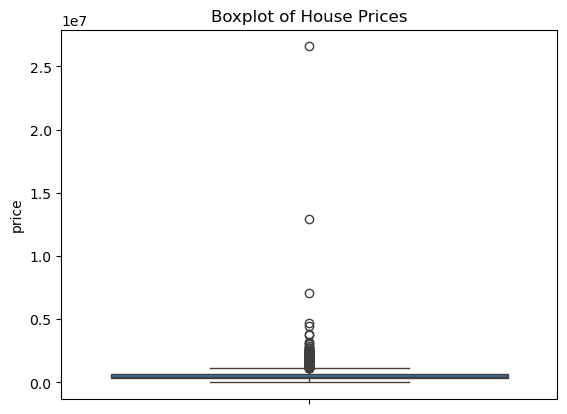

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['price'])
plt.title('Boxplot of House Prices')
plt.show()


In [31]:
data = data.drop(columns=['country'])


KeyError: "['country'] not found in axis"

In [ ]:
data = pd.get_dummies(data, columns=['city'], drop_first=True)
